In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 1.x
import cv2
import numpy as np
import os
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input ,Dense,Activation, Conv2D,AveragePooling2D,Flatten,MaxPool2D,Dropout
from keras.models import Model
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
# image_1 -> blue
# image_2 -> red
# image_3 -> red
# image_4 -> red
# image_5 -> red
# image_6 -> blue

# image   label
# [1]  [ 1]
# [3]  [ 1]
# [4 ]  [ 1]
# [5 ]  [ 1]
# [. ]  [ 1]
# [. ]  [ 1]
# [. ]  [ 1]
# [1 ]  [ 0]
# [6 ]  [ 0]
# [. ]  [ 0]
# [. ]  [ 0]
# [. ]  [ 0]

# (1200, 100, 100, 3)
# (1200, 1)
# for index, image in enumerate(images):

#   if label[index] = 1:
#     images_one.append(image)
#   else:
#     image_zero.append(image)

# 650 -> 1
# 550 -> 0

# .../


# .../

In [ ]:
labels = ['blue', 'white']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data('/content/drive/MyDrive/data3/train')
val = get_data('/content/drive/MyDrive/data3/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


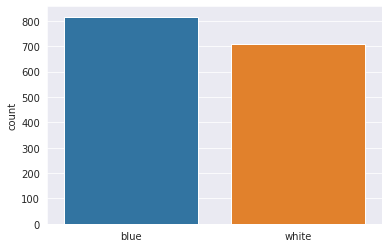

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("blue")
    else:
        l.append("white")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'white')

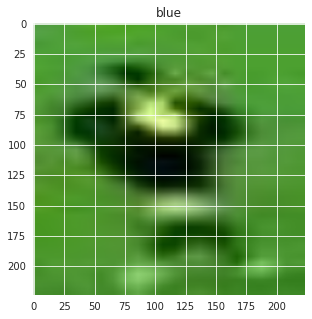

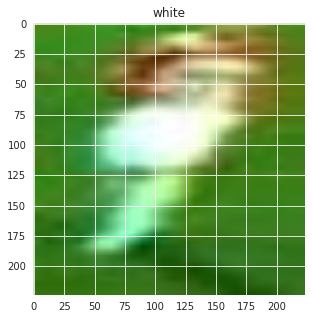

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_test.append(feature)
  y_test.append(label)

x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
# (x_train, y_train) , (x_test, y_test) = mnist.load_data()

# image_size = x_train.shape[1]

# x_train = x_train.astype('float32')/255
# x_test = x_test.astype('float32')/255
# print(x_train.shape)

In [ ]:
# x_train = x_train.reshape((-1,28,28,1))
# x_test = x_test.reshape((-1,28,28,1))

In [ ]:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# # 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# # 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# # 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# # 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
# # ...

In [ ]:
print("x_train shape is {}".format( x_train.shape ))
print("y_train shape is {}".format( y_train.shape ))
print("x_test shape is {}".format( x_test.shape ))
print("y_test shape is {}".format( y_test.shape ))

x_train shape is (1523, 224, 224, 3)
y_train shape is (1523,)
x_test shape is (139, 224, 224, 3)
y_test shape is (139,)


In [ ]:
  model = Sequential()
  model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
  model.add(MaxPool2D())

  model.add(Conv2D(32, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())

  model.add(Conv2D(64, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.35))

  model.add(Flatten())
  model.add(Dense(128,activation="relu"))
  model.add(Dense(2, activation="softmax"))

  model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
______________________________________

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
# def build_model(input_shape):
  
#   x_input = Input(shape =input_shape,name = 'input')

#   x = Conv2D(filters = 16,kernel_size = (2,2), strides = 1, padding = 'valid',name = 'conv2')(x_input)
#   x = Activation('relu')(x)
#   x = AveragePooling2D(pool_size =2,strides = 2,name = 'pad2')(x)

#   x = Flatten()(x)

#   x = Dense(units = 120, name = 'fc_1')(x)

#   x = Activation('relu', name = 'relu_1')(x)
#   # x = Dropout(rate = 0.5)

#   x = Dense(units = 84, name = 'fc_2')(x)
#   x = Activation('relu', name = 'relu_2')(x)
#   # x = Dropout(rate = 0.5)


#   outputs = Dense(units = 2,name = 'softmax', activation='softmax')(x)
  
#   model = Model(inputs = x_input, outputs = outputs)
#   model.summary()

#   return model

In [ ]:
# model = build_model(input_shape=(28,28,3))
# model.compile(optimizer = 'adam',loss = 'categorical_crossentropy' ,metrics = ['accuracy'])

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 3)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 27, 27, 16)        208       
_________________________________________________________________
activation_15 (Activation)   (None, 27, 27, 16)        0         
_________________________________________________________________
pad2 (AveragePooling2D)      (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 2704)              0         
_________________________________________________________________
fc_1 (Dense)                 (None, 120)               324600    
_________________________________________________________________
relu_1 (Activation)          (None, 120)               0  

In [ ]:
model.fit(x = x_train, y= y_train , epochs = 50)


Epoch 1/50
1523/1523 [==============================] - 10s 7ms/step - loss: 0.6912 - accuracy: 0.4288
Epoch 2/50
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6786 - accuracy: 0.0696
Epoch 3/50
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6657 - accuracy: 0.1011
Epoch 4/50
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6515 - accuracy: 0.1766
Epoch 5/50
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6354 - accuracy: 0.3526
Epoch 6/50
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6170 - accuracy: 0.4892
Epoch 7/50
1523/1523 [==============================] - 3s 2ms/step - loss: 0.5976 - accuracy: 0.5154
Epoch 8/50
1523/1523 [==============================] - 3s 2ms/step - loss: 0.5787 - accuracy: 0.5279
Epoch 9/50
1523/1523 [==============================] - 3s 2ms/step - loss: 0.5596 - accuracy: 0.5345
Epoch 10/50
1523/1523 [==============================] - 3s 2ms/step - loss: 0.5

0


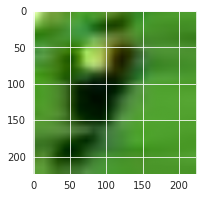

In [ ]:
sample = x_test[39]
print(y_test[33])
sample_show = sample.reshape((224,224,3))
plt.figure(figsize=(3,3))
plt.imshow(sample_show , cmap='gray')
plt.show()

In [ ]:
batch = np.expand_dims(sample, axis=0)
prediction = model.predict(batch)
print(prediction)
print(prediction[0])

[[0.9938399  0.00616015]]
[0.9938399  0.00616015]


In [ ]:
print(   np.argmax(prediction[0])    )

0


In [ ]:
counter=0
for i in range(133):
  sample = x_test[i]
  batch = np.expand_dims(sample, axis=0)
  prediction = model.predict(batch)
  if np.argmax(prediction[0])==y_test[i]:
    counter+=1

print(counter)

131


In [4]:
from __future__ import print_function
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

backSub = cv2.createBackgroundSubtractorMOG2()
capture = cv2.VideoCapture("/content/drive/MyDrive/Vid/input.mp4")

counter = 0
while True:
    ret, frame = capture.read()
    if frame is None:
        break

    img = cv2.imread('/content/drive/MyDrive/Vid/target.png')


    counter += 1
    frame = cv2.blur(frame, (7, 7))
    fgMask = backSub.apply(frame)

    threshold = 200
    ret, T = cv2.threshold(fgMask, threshold, 255, cv2.THRESH_BINARY)

    kernel = np.ones((5, 5), np.uint8)
    T = cv2.erode(T, kernel, iterations=1)

    ## opening
    kernel = np.ones((7, 7), np.uint8)
    T = cv2.morphologyEx(T, cv2.MORPH_OPEN, kernel)

    ## closing
    kernel = np.ones((23, 23), np.uint8)
    T = cv2.morphologyEx(T, cv2.MORPH_CLOSE, kernel)

    n, C, stats, centroids = cv2.connectedComponentsWithStats(T)

    p1 = (22, 148)
    p2 = (1225, 86)
    p3 = (1138, 117)
    p4 = (873, 780)

    points1 = np.array([p1, p2, p3, p4], dtype=np.float32)

    p11 = (5, 5)
    p22 = (1049, 5)
    p33 = (890, 152)
    p44 = (525, 655)

    points2 = np.array([p11, p22, p33, p44], dtype=np.float32)

    u = 1055
    m = 705
    output_size = (u, m)

    H = cv2.getPerspectiveTransform(points1, points2)
    J = cv2.warpPerspective(frame, H, output_size)

    if counter >= 60:
        for k in range(n):
            if k == 0:
                continue
            # show the k-th connected component
            Ck = np.zeros(T.shape, dtype=T.dtype)
            Ck[C == k] = 255
            x1=int(centroids[k][0])-14
            y1=int(centroids[k][1])-14
            x2=int(centroids[k][0])+14
            y2=int(centroids[k][1])+14
            sample = frame[y1:y2, x1:x2]
            pts = np.float32([[centroids[k][0], centroids[k][1]]]).reshape(-1, 1, 2)
            J = cv2.perspectiveTransform(pts, H)

            sample=cv2.resize(sample,(224,224))
            batch = np.expand_dims(sample, axis=0)
            prediction = model.predict(batch)
            if np.argmax(prediction[0])==1:
                cv2.circle(img, (int(J[0][0][0]),int(J[0][0][1])), 5, [255,255,255],2)
            else:
                cv2.circle(img, (int(J[0][0][0]),int(J[0][0][1])), 5, [0,0,255],2)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cv2_imshow(img);

    cv2.rectangle(frame, (10, 2), (100, 20), (255, 255, 255), -1)
    cv2.putText(frame, str(capture.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    # cv2_imshow(T)
    # cv2_imshow(fgMask)

    keyboard = cv2.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break


NameError: ignored

## Split and Shuffle

In [ ]:
train_x, test_x, train_y, test_y  = train_test_split(x_train, y_train , test_size=0.1, shuffle=True, random_state=5)

In [ ]:
print("train_x shape is {}".format( train_x.shape ))
print("train_y shape is {}".format( train_y.shape ))
print("test_x shape is {}".format( test_x.shape ))
print("test_y shape is {}".format( test_y.shape ))

In [ ]:
sample = test_x[25]
sample_show = sample.reshape((28,28))
plt.figure(figsize=(3,3))
plt.imshow(sample_show , cmap='gray')
plt.show()

## Batch


In [ ]:
model.fit(x = x_train, y= y_train , batch_size=5, epochs = 4)

## Generator


In [ ]:
datagen = ImageDataGenerator(
          rotation_range=30,
          width_shift_range=0.2,
          height_shift_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')

In [ ]:
batch_size = 64

 
H = model.fit_generator(datagen.flow(train_x, train_y, batch_size=batch_size),
  validation_data=(test_x, test_y),                       
	steps_per_epoch=len(train_y) // batch_size, epochs=20)

In [ ]:
sample = test_x[25]
sample_show = sample.reshape((28,28))
plt.figure(figsize=(3,3))
plt.imshow(sample_show , cmap='gray')
plt.show()

In [ ]:
sample = cv2.resize(sample,(100,100))
sample = sample.reshape((100,100,1))
print(sample.shape)
samples = np.expand_dims(sample, axis=0)
imageGen = datagen.flow(samples, batch_size=1, save_to_dir='.',save_prefix="image", save_format="jpg")
i=0
for e in imageGen:
    if (i == 20):
        break
    i = i +1

In [ ]:
# ! rm -rf *.jpg